<div style="background-color:#00000">
    <img src="https://fundacionsadosky.org.ar/wp-content/uploads/2022/08/logo.png" />
</div>
<div style="background-color:#03030a; margin:20px 45%">
    <img src="https://www.rfindustrial.com/wp-content/uploads/2023/04/cropped-1080x1080_Mesa-de-trabajo-1.png" />
</div>
<div style="background-color:#00000;">
    <img src="https://sinc.unl.edu.ar/wp-content/themes/sinci/img/sinc-logo.png" />
</div>

<p style="font-size: 30px">
    <strong>COPE - “Sistema inteligente de medición de nivel y control de velocidad de bombeo para pozos petrolíferos"</strong>
</p>

<p style="font-size: 20px">
    Objetivo del análisis: Comprender el comportamiento de los distintos pozos a lo largo del tiempo respecto a variables del mismo.
</p>

12/09/2023

# Imports generales

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
sys.path.append("../") # go to parent dir

import pandas as pd
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
# Set notebook mode to work in offline
pyo.init_notebook_mode(connected=True)

from src.data import utils
from src.methods import utils
from src.methods import base as base_methods

# Carga de datos

In [2]:
df = pd.read_csv('../data/raw/dinamometrias.csv')

In [3]:
df.head(2)

,fecha,pozo,porcentaje agua,presion casing,presion boca pozo,yacimiento,zona,carrera,gpm,tv,...,estiramiento,profundidad bomba,cuplas,produccion petroleo,profundidad gas,profundidad niveles,velocidad sonido,sumergencia efectiva,presion dinamica,presion interface
0,2022-10-14,F 281,98.45,0.5,4.5,DIADEMA,ZONA 2,167.99,7.94,15541,...,23.69,1925.74,18.2,0.1,171,1598,363,328,436,8
1,2022-10-20,H 129,92.85,0.0,6.5,DIADEMA,ZONA 4,168.77,5.04,18647,...,29.56,1454.49,142.6,6.1,1341,1367,388,88,117,2


In [4]:
df.describe()

,presion casing,presion boca pozo,carrera,gpm,tv,sv,cbe,tmax,vpmax,carga max fondo,...,estiramiento,profundidad bomba,cuplas,produccion petroleo,profundidad gas,profundidad niveles,velocidad sonido,sumergencia efectiva,presion dinamica,presion interface
count,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,...,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,2.836252,11.040255,152.085631,5.665913,15125.555653,9613.488781,14959.559173,525910.671359,0.638583,6258.824901,...,24.658812,1626.684611,130.886450,5.942895,1230.312802,1354.754070,364.327761,271.737791,402.556973,47.991201
std,4.582152,7.396871,29.968334,1.872075,3683.317522,2564.983998,3317.775167,191646.861505,0.326733,2578.630607,...,9.951332,361.211442,44.208121,8.279344,415.825745,386.975344,277.335485,287.542077,364.172842,74.407779
min,0.000000,0.000000,17.250000,1.700000,1805.000000,646.000000,0.000000,0.000000,0.100000,11.000000,...,0.970000,134.580000,8.500000,-11.400000,80.000000,82.000000,183.000000,1.000000,18.000000,0.000000
25%,0.000000,6.000000,143.780000,4.070000,12815.000000,8160.000000,13449.000000,397473.000000,0.400000,4399.000000,...,17.370000,1404.420000,103.700000,2.200000,973.000000,1101.000000,310.000000,65.000000,150.000000,2.000000
50%,0.100000,10.000000,167.560000,5.320000,15523.000000,9558.000000,15634.000000,550713.000000,0.600000,5951.000000,...,23.450000,1574.660000,127.000000,3.700000,1194.000000,1317.000000,355.000000,159.000000,277.000000,4.000000
75%,4.500000,15.000000,168.500000,7.090000,17983.000000,11549.000000,16565.000000,660738.000000,0.900000,7796.000000,...,31.310000,1932.900000,156.000000,6.800000,1468.000000,1665.000000,390.000000,368.000000,541.000000,76.000000
max,24.400000,56.000000,194.630000,11.680000,25081.000000,16983.000000,23083.000000,988476.000000,1.600000,16914.000000,...,76.230000,2648.000000,269.400000,241.000000,2533.000000,2578.000000,7825.000000,1616.000000,2112.000000,391.000000


<Axes: ylabel='Frequency'>

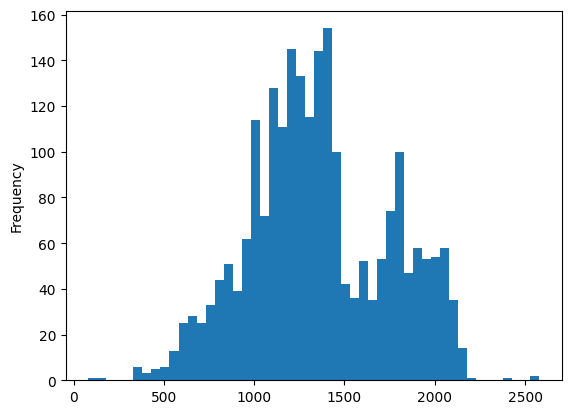

In [5]:
df['profundidad niveles'].plot.hist(bins=50)

In [6]:
df['profundidad niveles'].sort_values().head(10)

1551     82
1598    172
469     332
173     338
334     347
827     353
284     358
125     377
1614    395
339     398
Name: profundidad niveles, dtype: int64

In [7]:
df['fecha'] = pd.to_datetime(df.fecha)
df = df.sort_values(by=['pozo', 'fecha'])
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
df['porcentaje_agua'] = pd.to_numeric(df.porcentaje_agua, errors='coerce')

In [8]:
df.pozo.value_counts().head(15)

E 184       35
E 180       34
EAS 2003    34
E 175       34
E 153       33
E 198       33
E 191       33
E 151       33
H 129       32
L 109       32
E 186       32
E 202       32
H 125       31
L 98        31
E 131       31
Name: pozo, dtype: int64

# Análisis general de la información

In [9]:
df.describe()

,porcentaje_agua,presion_casing,presion_boca_pozo,carrera,gpm,tv,sv,cbe,tmax,vpmax,...,estiramiento,profundidad_bomba,cuplas,produccion_petroleo,profundidad_gas,profundidad_niveles,velocidad_sonido,sumergencia_efectiva,presion_dinamica,presion_interface
count,2270.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,...,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,76.927242,2.836252,11.040255,152.085631,5.665913,15125.555653,9613.488781,14959.559173,525910.671359,0.638583,...,24.658812,1626.684611,130.886450,5.942895,1230.312802,1354.754070,364.327761,271.737791,402.556973,47.991201
std,24.238659,4.582152,7.396871,29.968334,1.872075,3683.317522,2564.983998,3317.775167,191646.861505,0.326733,...,9.951332,361.211442,44.208121,8.279344,415.825745,386.975344,277.335485,287.542077,364.172842,74.407779
min,2.730000,0.000000,0.000000,17.250000,1.700000,1805.000000,646.000000,0.000000,0.000000,0.100000,...,0.970000,134.580000,8.500000,-11.400000,80.000000,82.000000,183.000000,1.000000,18.000000,0.000000
25%,66.037500,0.000000,6.000000,143.780000,4.070000,12815.000000,8160.000000,13449.000000,397473.000000,0.400000,...,17.370000,1404.420000,103.700000,2.200000,973.000000,1101.000000,310.000000,65.000000,150.000000,2.000000
50%,87.590000,0.100000,10.000000,167.560000,5.320000,15523.000000,9558.000000,15634.000000,550713.000000,0.600000,...,23.450000,1574.660000,127.000000,3.700000,1194.000000,1317.000000,355.000000,159.000000,277.000000,4.000000
75%,94.215000,4.500000,15.000000,168.500000,7.090000,17983.000000,11549.000000,16565.000000,660738.000000,0.900000,...,31.310000,1932.900000,156.000000,6.800000,1468.000000,1665.000000,390.000000,368.000000,541.000000,76.000000
max,99.960000,24.400000,56.000000,194.630000,11.680000,25081.000000,16983.000000,23083.000000,988476.000000,1.600000,...,76.230000,2648.000000,269.400000,241.000000,2533.000000,2578.000000,7825.000000,1616.000000,2112.000000,391.000000


# Análisis de correlaciones

In [10]:
col_types = df.dtypes

numeric_cols = []
for i, v in zip(col_types.index, col_types.values):
    if v != 'object' and v != 'datetime64[ns]':
        numeric_cols.append(i)

fig = px.imshow(df[numeric_cols].corr(), text_auto=True, aspect="auto")
fig.show()

In [11]:
def plot_well_behaviour(well_id, df):
    _df = df[df.pozo == well_id]
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.profundidad_gas, name="Profundidad gas"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.profundidad_niveles, name="Profundidad niveles"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.profundidad_bomba, name="Profundidad bomba"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.velocidad_sonido, name="Velocidad del sonido"),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title_text="Análisis de la evolución de diferentes variables del pozo " + well_id
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Fecha")

    # Set y-axes titles
    fig.update_yaxes(title_text="Profundidad", secondary_y=False)
    fig.update_yaxes(title_text="Velocidad", secondary_y=True)

    fig.show()
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.profundidad_bomba, name="Profundidad bomba"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.produccion_petroleo, name="Producción petroleo"),
        secondary_y=True,
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Fecha")

    # Set y-axes titles
    fig.update_yaxes(title_text="Profundidad", secondary_y=False)
    fig.update_yaxes(title_text="Producción", secondary_y=True)

    fig.show()
    
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.presion_dinamica, name="Presión dinámica"),
        secondary_y=False,
    )
    
    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.presion_interface, name="Presión interface"),
        secondary_y=False,
    )

    fig.add_trace(
        go.Scatter(x=_df.fecha, y=_df.velocidad_sonido, name="Velocidad del sonido"),
        secondary_y=True,
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Fecha")

    # Set y-axes titles
    fig.update_yaxes(title_text="Presión", secondary_y=False)
    fig.update_yaxes(title_text="Velocidad", secondary_y=True)

    fig.show()

In [12]:
plot_well_behaviour('F 275', df)

In [13]:
plot_well_behaviour('E 180', df)

In [14]:
plot_well_behaviour('E 184', df)

In [15]:
plot_well_behaviour('E 151', df)

In [16]:
plot_well_behaviour('L 109', df)

In [17]:
plot_well_behaviour('H 129', df)

# Variabilidad promedio de velocidad intrapozo (para aquellos pozos con al menos dos mediciones)

In [18]:
_df = df.pozo.value_counts()
wells = _df[_df > 2].index
_df = df[df.pozo.isin(wells)]
speed_mean_variation = round(_df.groupby('pozo').velocidad_sonido.std().mean(), 4)
print(f'En promedio la velocidad de los pozos varía {speed_mean_variation} m/s')

En promedio la velocidad de los pozos varía 59.7601 m/s


# Análisis del comportamiento de la velocidad

In [19]:
cols = ['velocidad_sonido', 'profundidad_gas', 'profundidad_niveles', 'profundidad_bomba', 'presion_dinamica', 'porcentaje_agua']
_df = df[df.velocidad_sonido < df.velocidad_sonido.quantile(0.99)]
sns.pairplot(_df[cols])

# Análisis de valores anómalos

In [20]:
df[df.profundidad_bomba <= df.produccion_petroleo]

,fecha,pozo,porcentaje_agua,presion_casing,presion_boca_pozo,yacimiento,zona,carrera,gpm,tv,...,estiramiento,profundidad_bomba,cuplas,produccion_petroleo,profundidad_gas,profundidad_niveles,velocidad_sonido,sumergencia_efectiva,presion_dinamica,presion_interface


In [21]:
df[df.profundidad_bomba <= df.profundidad_gas]

,fecha,pozo,porcentaje_agua,presion_casing,presion_boca_pozo,yacimiento,zona,carrera,gpm,tv,...,estiramiento,profundidad_bomba,cuplas,produccion_petroleo,profundidad_gas,profundidad_niveles,velocidad_sonido,sumergencia_efectiva,presion_dinamica,presion_interface


In [22]:
df[df.profundidad_bomba <= df.profundidad_niveles]

,fecha,pozo,porcentaje_agua,presion_casing,presion_boca_pozo,yacimiento,zona,carrera,gpm,tv,...,estiramiento,profundidad_bomba,cuplas,produccion_petroleo,profundidad_gas,profundidad_niveles,velocidad_sonido,sumergencia_efectiva,presion_dinamica,presion_interface


In [23]:
df[df.velocidad_sonido > 800]

,fecha,pozo,porcentaje_agua,presion_casing,presion_boca_pozo,yacimiento,zona,carrera,gpm,tv,...,estiramiento,profundidad_bomba,cuplas,produccion_petroleo,profundidad_gas,profundidad_niveles,velocidad_sonido,sumergencia_efectiva,presion_dinamica,presion_interface
1748,2021-01-05,E 196,72.03,14.2,16.5,DIADEMA,ZONA 6,143.58,5.50,12496,...,14.42,1265.00,130.8,9.7,1229,1229,4431,36,278,231
1800,2021-02-01,E 196,72.03,14.5,15.0,DIADEMA,ZONA 6,142.97,5.40,12363,...,15.75,1265.00,129.4,9.7,1216,1236,4317,29,273,236
2056,2020-12-10,E 207,95.00,24.4,27.0,DIADEMA,ZONA 6,167.33,5.85,11009,...,12.57,1244.22,117.0,1.3,1100,1201,3236,42,446,391
1867,2021-08-12,L 109,94.94,0.0,5.0,DIADEMA,ZONA 7,168.33,8.00,14390,...,17.24,1288.34,104.0,5.8,978,978,4969,310,407,2
900,2022-05-24,L 83,93.79,0.0,5.5,DIADEMA,ZONA 4,168.89,5.25,15443,...,20.81,1631.14,158.8,1.3,1493,1526,7825,105,140,2
767,2022-08-19,L 83,85.55,0.0,4.0,DIADEMA,ZONA 4,168.19,6.52,14125,...,20.31,1631.14,147.6,3.9,1387,1510,7588,121,160,2


In [24]:
df[df.produccion_petroleo < 0]

,fecha,pozo,porcentaje_agua,presion_casing,presion_boca_pozo,yacimiento,zona,carrera,gpm,tv,...,estiramiento,profundidad_bomba,cuplas,produccion_petroleo,profundidad_gas,profundidad_niveles,velocidad_sonido,sumergencia_efectiva,presion_dinamica,presion_interface
1493,2021-09-06,E 189,NaN,6.4,7.0,DIADEMA,ZONA 6,168.62,6.08,8523,...,7.71,1404.72,98.5,-11.4,924,1012,286,393,615,102


In [25]:
df[df.profundidad_gas > df.profundidad_niveles]

,fecha,pozo,porcentaje_agua,presion_casing,presion_boca_pozo,yacimiento,zona,carrera,gpm,tv,...,estiramiento,profundidad_bomba,cuplas,produccion_petroleo,profundidad_gas,profundidad_niveles,velocidad_sonido,sumergencia_efectiva,presion_dinamica,presion_interface
359,2022-07-07,07 07,69.67,11.9,12.5,DIADEMA,ZONA 6,144.50,3.52,13532,...,19.21,1463.20,149.5,1.7,1404,1403,282,59,275,198
104,2022-04-14,14 H,78.06,0.1,3.0,DIADEMA,ZONA 4,166.53,6.88,15470,...,35.84,2157.47,135.3,10.1,1273,1272,404,885,1160,4
124,2022-04-14,14 H,89.01,0.0,2.0,DIADEMA,ZONA 4,143.61,6.94,16187,...,23.45,1775.39,162.2,4.2,1525,1524,385,250,330,3
1649,2021-12-21,A 53,80.00,0.0,1.5,DIADEMA,BAT6,193.18,4.99,18116,...,29.23,2304.08,93.9,13.0,883,882,357,1421,1859,1
1637,2021-12-29,A 53,80.00,0.0,11.0,DIADEMA,BAT6,193.20,6.88,16983,...,26.94,2304.08,95.3,13.0,896,895,273,1408,1842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2022-04-21,L 96,61.53,1.5,2.0,DIADEMA,ZONA 4,144.74,7.18,11169,...,17.68,1464.46,79.5,19.3,747,746,340,718,962,24
137,2022-04-26,L 97,90.25,0.0,7.0,DIADEMA,ZONA 7,168.50,6.85,17974,...,28.18,1646.06,131.3,11.1,1235,1234,403,411,539,2
327,2022-07-22,L 98,90.45,0.0,30.0,DIADEMA,ZONA 7,168.80,8.77,20231,...,29.64,1578.35,113.4,14.1,1065,1064,386,513,673,2
822,2022-08-19,L 98,89.91,0.0,6.5,DIADEMA,ZONA 7,169.06,8.85,19452,...,29.67,1578.35,116.5,14.1,1094,1093,413,484,635,2


# Preguntas/anotaciones:
- El nivel de profundidad del petroleo, no debería mantenerse constante o en su defecto ir aumentando conforme se extrae el mismo?. Esto no siempre es así, por ejemplo ver pozo E 151.
- De que depende que hagan dos tipos de informe?. Algunos tienen 3 hojas, otros 5/6 con más información.
- Qué tan fiables son las mediciones de la velocidad del sonido que aparecen en estos informes?. Hay valores de 4969 m/s por ejemplo (ver pozo L 109).
- Que hace que haya cambios bruscos en el pozo respecto a los niveles y la velocidad del mismo?. Es factible que pase esto o son errores de medición?. Ver pozo E 184 por ejemplo.
- En todos los casos, la profundidad de la bomba parece mantenerse constante (a excepción de algún cambio). El objetivo de estas mediciones que realizan no es justamente modificar la profundidad de la bomba?
- Parecería haber una correlación (aunque no muy fuerte) entre la profundidad de la bomba y la producción del pozo.


# Diferencia en días entre estudios consecutivos

In [33]:
import numpy as np

In [34]:
df = df.sort_values(['pozo', 'fecha'])
df['dias_estudio_previo'] = df.fecha - df.shift(1).fecha
df['pozo_estudio_previo'] = df.shift(1).pozo
df.loc[df.pozo_estudio_previo != df.pozo, 'dias_estudio_previo'] = np.nan

In [36]:
df.dias_estudio_previo.describe()

count                          2132
mean     35 days 11:28:15.309568480
std      41 days 08:21:41.850626891
min                 0 days 00:00:00
25%                27 days 00:00:00
50%                30 days 00:00:00
75%                35 days 00:00:00
max               791 days 00:00:00
Name: dias_estudio_previo, dtype: object

<Axes: ylabel='Frequency'>

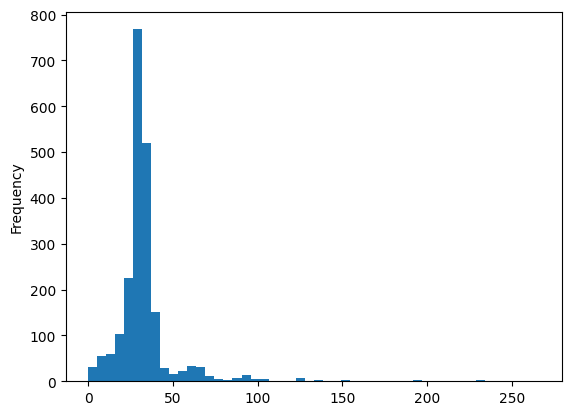

In [37]:
df[df.dias_estudio_previo.dt.days < 300].dias_estudio_previo.dt.days.plot.hist(bins=50)

In [38]:
df[df.dias_estudio_previo.dt.days < 35].shape

(1557, 29)

# Analizar correlaciones entre diferencias entre mediciones consecutivas de un pozo

In [40]:
cols_to_include = ['fecha', 'porcentaje_agua', 'presion_casing', 'presion_boca_pozo',
                   'tv', 'sv', 'cbe', 'tmax', 'vpmax', 'carga_max_fondo', 'carga_min_fondo',
                   'sobre_recorrido', 'estiramiento',
                   'profundidad_bomba', 'cuplas',
                   'produccion_petroleo', 'profundidad_gas', 'profundidad_niveles',
                   'velocidad_sonido', 'sumergencia_efectiva', 'presion_dinamica',
                   'presion_interface', 'gpm', 'carrera']

for c in cols_to_include:
    df[f'diff_{c}'] = df[c] - df.shift(1)[c]
    df.loc[df.pozo != df.pozo_estudio_previo, f'diff_{c}'] = np.nan

In [41]:
df['diff_fecha'] = df.diff_fecha.dt.days

In [43]:
col_types = df.dtypes

numeric_cols = []
for i, v in zip(col_types.index, col_types.values):
    if v != 'object' and v != 'datetime64[ns]':
        numeric_cols.append(i)

fig = px.imshow(df.corr(numeric_only=True, method='spearman'), text_auto=True, aspect="auto")
fig.show()